In [36]:
%matplotlib notebook

In [37]:
# This is my first ML project after completing a ML course on coursera.
# https://www.kaggle.com/c/sf-crime

from matplotlib import pyplot as plt
train = pd.read_csv("/home/scott/Documents/GIT/data-science/kaggle/San Francisco Crime Classification/train.csv")
test = pd.read_csv("/home/scott/Documents/GIT/data-science/kaggle/San Francisco Crime Classification/test.csv")
train.head(10)

Dates        Category                        Descript  \
0  2015-05-13 23:53:00        WARRANTS                  WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES        TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
5  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM UNLOCKED AUTO   
6  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
7  2015-05-13 23:30:00   VEHICLE THEFT               STOLEN AUTOMOBILE   
8  2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   
9  2015-05-13 23:00:00   LARCENY/THEFT    GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                        Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED             OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED      VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE       1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE      100 Block of BRODERICK ST   
5  Wednesday  INGLESIDE            NONE            0 Block of TEDDY AV   
6  Wednesday  INGLESIDE            NONE            AVALON AV / PERU AV   
7  Wednesday    BAYVIEW            NONE       KIRKWOOD AV / DONAHUE ST   
8  Wednesday   RICHMOND            NONE           600 Block of 47TH AV   
9  Wednesday    CENTRAL            NONE  JEFFERSON ST / LEAVENWORTH ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541  
5 -122.403252  37.713431  
6 -122.423327  37.725138  
7 -122.371274  37.727564  
8 -122.508194  37.776601  
9 -122.419088  37.807802

In [38]:
# Dropping useless data - the data that's absent in the test dataset or coordinates (we have the district instead)
train.drop(['X', 'Y', 'Descript', 'Resolution'], inplace=True, axis=1)
test.drop(['X', 'Y'], inplace=True, axis=1)

In [39]:
#Assumptions:
#District, time of day and day of the week are three big predictors of the category of crime.

In [40]:
sorted(train.DayOfWeek.unique())

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [41]:
days = list(zip(sorted(train.DayOfWeek.unique()), [5, 1, 6, 7, 4, 2, 3]))
days_dict = {k : v for k, v in days}
days_dict

{'Friday': 5,
 'Monday': 1,
 'Saturday': 6,
 'Sunday': 7,
 'Thursday': 4,
 'Tuesday': 2,
 'Wednesday': 3}

In [42]:
train.DayOfWeek = train.DayOfWeek.map(days_dict)
test.DayOfWeek = test.DayOfWeek.map(days_dict)

In [43]:
train['weekend'] = train.DayOfWeek.apply(lambda x: 1 if x in [5, 6, 7] else 0)
test['weekend'] = test.DayOfWeek.apply(lambda x: 1 if x  in [5, 6, 7] else 0)

In [44]:
train.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [45]:
district_dict = dict(zip(train.PdDistrict.unique(), list(range(len(train.PdDistrict.unique())))))
district_dict

{'BAYVIEW': 3,
 'CENTRAL': 5,
 'INGLESIDE': 2,
 'MISSION': 8,
 'NORTHERN': 0,
 'PARK': 1,
 'RICHMOND': 4,
 'SOUTHERN': 9,
 'TARAVAL': 6,
 'TENDERLOIN': 7}

In [46]:
train.PdDistrict = train.PdDistrict.map(district_dict)
test.PdDistrict = test.PdDistrict.map(district_dict)

In [47]:
train.head()

Dates        Category  DayOfWeek  PdDistrict  \
0  2015-05-13 23:53:00        WARRANTS          3           0   
1  2015-05-13 23:53:00  OTHER OFFENSES          3           0   
2  2015-05-13 23:33:00  OTHER OFFENSES          3           0   
3  2015-05-13 23:30:00   LARCENY/THEFT          3           0   
4  2015-05-13 23:30:00   LARCENY/THEFT          3           1   

                     Address  weekend  
0         OAK ST / LAGUNA ST        0  
1         OAK ST / LAGUNA ST        0  
2  VANNESS AV / GREENWICH ST        0  
3   1500 Block of LOMBARD ST        0  
4  100 Block of BRODERICK ST        0

In [48]:
train['hour'] = train.Dates.str.findall("\d\d\s(\d\d):\d\d:\d\d").apply(lambda x: int(x[0]))
test['hour'] = test.Dates.str.findall("\d\d\s(\d\d):\d\d:\d\d").apply(lambda x: int(x[0]))

In [49]:
def get_time_of_day(hour):
    # differentiating day and night
    if hour in [23, 0, 1, 2, 3, 4, 5, 6, 7]:
        return 1
    elif hour in range(7, 23):
        return 2

In [50]:
train['daynight'] = train['hour'].apply(get_time_of_day)
test['daynight'] = test['hour'].apply(get_time_of_day)

In [51]:
# Now I would like to visualize some data about the properties of each crime category
train.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [52]:
lista = []
for crime in train.Category.unique():
    subset = train[train.Category == crime]
    lista.append([crime, subset.daynight.value_counts()[1], 
                  subset.daynight.value_counts()[2]])   

In [53]:
night_summary = pd.DataFrame(lista, columns=['crime', 'night', 'day'])

night_summary['% night'] = night_summary.apply(lambda row:\
                                               round(row['night'] / sum([row['night'], row['day']]), 2), axis=1)

In [54]:
night_summary.sort_values("% night")

crime  night     day  % night
38      PORNOGRAPHY/OBSCENE MAT      3      19     0.14
34                     GAMBLING     21     125     0.14
13                DRUG/NARCOTIC   8879   45092     0.16
26              FAMILY OFFENSES     85     406     0.17
2                 LARCENY/THEFT  31939  142961     0.18
20                      RUNAWAY    341    1605     0.18
27                  LIQUOR LAWS    366    1537     0.19
17               MISSING PERSON   4873   21116     0.19
12       FORGERY/COUNTERFEITING   2168    8441     0.20
35                   BAD CHECKS     85     321     0.21
5                  NON-CRIMINAL  19351   72953     0.21
30                      SUICIDE    112     396     0.22
0                      WARRANTS   9446   32768     0.22
3                 VEHICLE THEFT  11793   41988     0.22
10               SUSPICIOUS OCC   7247   24167     0.23
9                      BURGLARY   8934   27821     0.24
18                        FRAUD   3986   12693     0.24
37            RECOVERED VEHICLE    755    2383     0.24
1                OTHER OFFENSES  30328   95854     0.24
14              STOLEN PROPERTY   1132    3408     0.25
8                   WEAPON LAWS   2120    6435     0.25
29                 EMBEZZLEMENT    291     875     0.25
15              SECONDARY CODES   2620    7365     0.26
32    SEX OFFENSES NON FORCIBLE     39     109     0.26
28                      BRIBERY     74     215     0.26
33                    EXTORTION     69     187     0.27
16                     TRESPASS   2087    5239     0.28
7                       ASSAULT  21407   55469     0.28
4                     VANDALISM  13146   31579     0.29
31                    LOITERING    387     838     0.32
36                         TREA      2       4     0.33
19                   KIDNAPPING    768    1573     0.33
6                       ROBBERY   7937   15063     0.35
11                  DRUNKENNESS   1603    2677     0.37
22        SEX OFFENSES FORCIBLE   1719    2669     0.39
24           DISORDERLY CONDUCT   1909    2411     0.44
23                 PROSTITUTION   3407    4077     0.46
25                        ARSON    714     799     0.47
21  DRIVING UNDER THE INFLUENCE   1346     922     0.59

In [55]:
# I expected it to be a bit different - I thought many more incidents would happen at night.
# Here only DUI happens mainly at night. I wonder if this is because there are more officers in the streets
# during daytime, or if crimes that happened at night are reported the next day.
# Bottom Line - I thought this feature would be stronger.

In [56]:
train.head(10)

Dates        Category  DayOfWeek  PdDistrict  \
0  2015-05-13 23:53:00        WARRANTS          3           0   
1  2015-05-13 23:53:00  OTHER OFFENSES          3           0   
2  2015-05-13 23:33:00  OTHER OFFENSES          3           0   
3  2015-05-13 23:30:00   LARCENY/THEFT          3           0   
4  2015-05-13 23:30:00   LARCENY/THEFT          3           1   
5  2015-05-13 23:30:00   LARCENY/THEFT          3           2   
6  2015-05-13 23:30:00   VEHICLE THEFT          3           2   
7  2015-05-13 23:30:00   VEHICLE THEFT          3           3   
8  2015-05-13 23:00:00   LARCENY/THEFT          3           4   
9  2015-05-13 23:00:00   LARCENY/THEFT          3           5   

                         Address  weekend  hour  daynight  
0             OAK ST / LAGUNA ST        0    23         1  
1             OAK ST / LAGUNA ST        0    23         1  
2      VANNESS AV / GREENWICH ST        0    23         1  
3       1500 Block of LOMBARD ST        0    23         1  
4      100 Block of BRODERICK ST        0    23         1  
5            0 Block of TEDDY AV        0    23         1  
6            AVALON AV / PERU AV        0    23         1  
7       KIRKWOOD AV / DONAHUE ST        0    23         1  
8           600 Block of 47TH AV        0    23         1  
9  JEFFERSON ST / LEAVENWORTH ST        0    23         1

In [57]:
# We can extract another feature from address. A lot of theft happens in the street - hence "block of" in address
# On the contrary, I assume that every burglary would have a precise address

In [58]:
train[train.Category == "BURGLARY"].head(10)

Dates  Category  DayOfWeek  PdDistrict  \
49   2015-05-13 19:52:00  BURGLARY          3           1   
87   2015-05-13 18:30:00  BURGLARY          3           3   
97   2015-05-13 18:00:00  BURGLARY          3           9   
104  2015-05-13 17:55:00  BURGLARY          3           9   
124  2015-05-13 17:20:00  BURGLARY          3           5   
129  2015-05-13 17:00:00  BURGLARY          3           0   
181  2015-05-13 14:45:00  BURGLARY          3           9   
189  2015-05-13 14:30:00  BURGLARY          3           2   
208  2015-05-13 14:00:00  BURGLARY          3           2   
210  2015-05-13 14:00:00  BURGLARY          3           6   

                       Address  weekend  hour  daynight  
49     1500 Block of HAIGHT ST        0    19         2  
87     1300 Block of FELTON ST        0    18         2  
97           0 Block of 6TH ST        0    18         2  
104    1200 Block of MARKET ST        0    17         2  
124      600 Block of JONES ST        0    17         2  
129      500 Block of GROVE ST        0    17         2  
181     800 Block of FOLSOM ST        0    14         2  
189    700 Block of MIRAMAR AV        0    14         2  
208    100 Block of MELROSE AV        0    14         2  
210  200 Block of CRESTLAKE DR        0    14         2

In [59]:
# Damn that's not true

In [60]:
cat_map = list(zip(sorted(train.Category.unique()), range(len(train.Category.unique()))))
cat_map = {k : v for k, v in cat_map}
train['Category'] = train['Category'].map(cat_map)

<IPython.core.display.Javascript object>


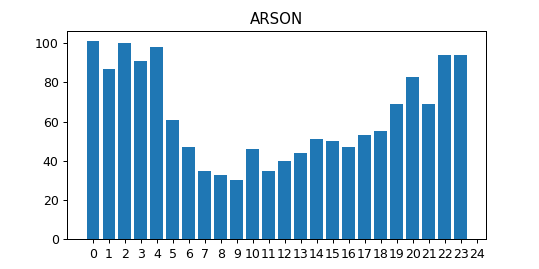

<IPython.core.display.Javascript object>


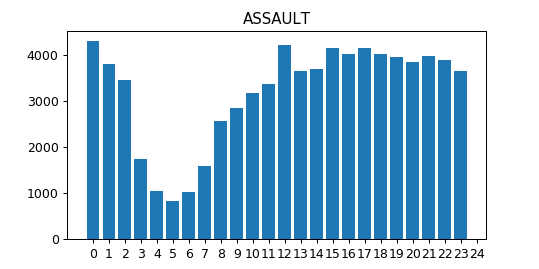

<IPython.core.display.Javascript object>


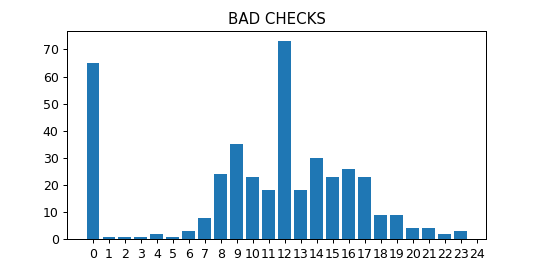

<IPython.core.display.Javascript object>


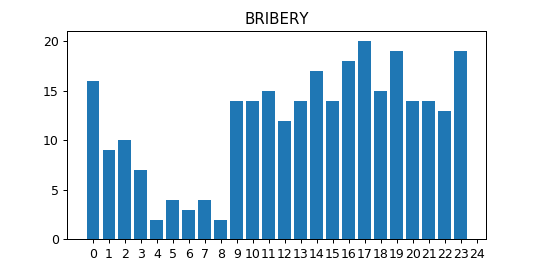

<IPython.core.display.Javascript object>


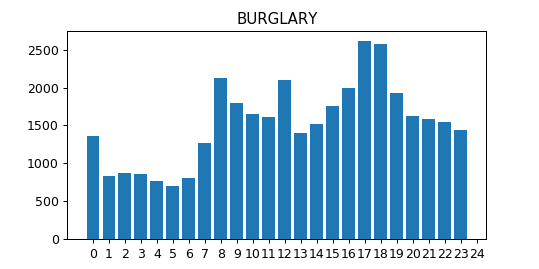

<IPython.core.display.Javascript object>


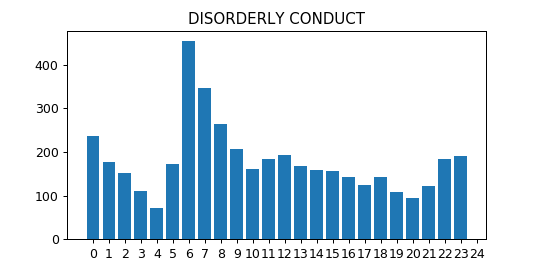

<IPython.core.display.Javascript object>


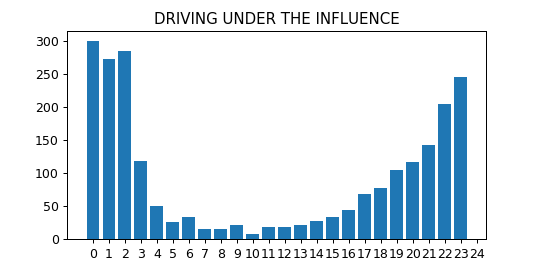

<IPython.core.display.Javascript object>


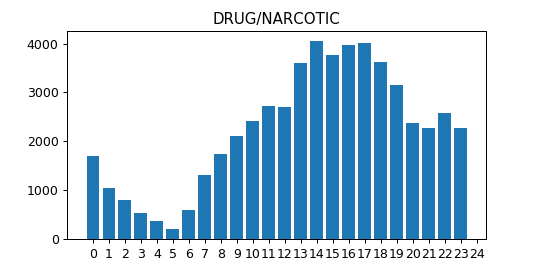

<IPython.core.display.Javascript object>


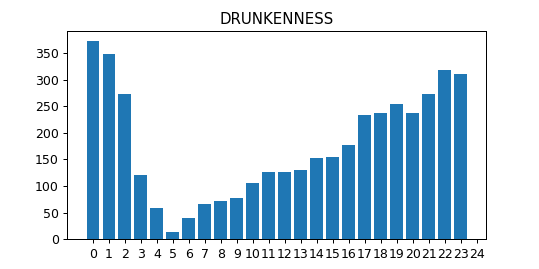

<IPython.core.display.Javascript object>


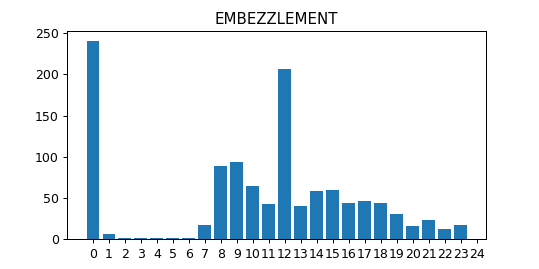

<IPython.core.display.Javascript object>


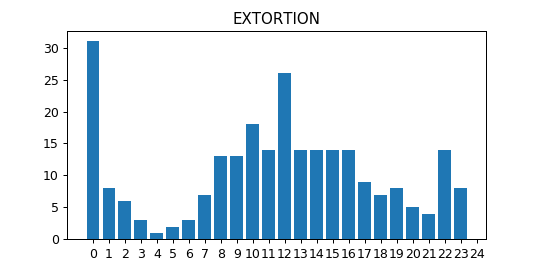

<IPython.core.display.Javascript object>


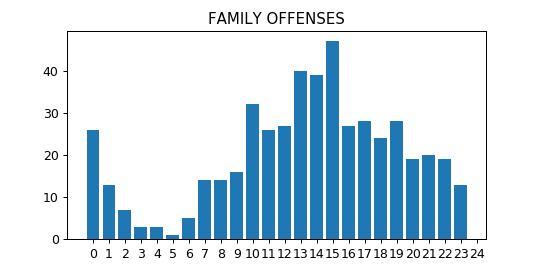

<IPython.core.display.Javascript object>


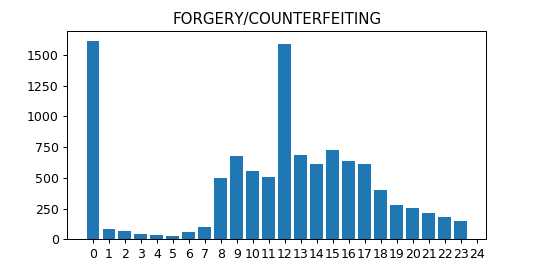

<IPython.core.display.Javascript object>


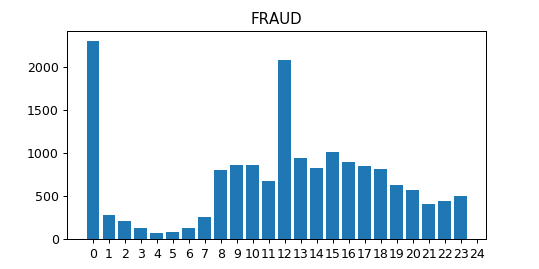

<IPython.core.display.Javascript object>


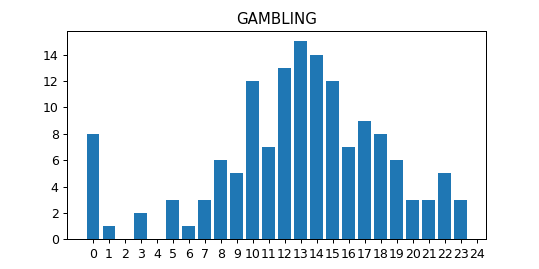

<IPython.core.display.Javascript object>


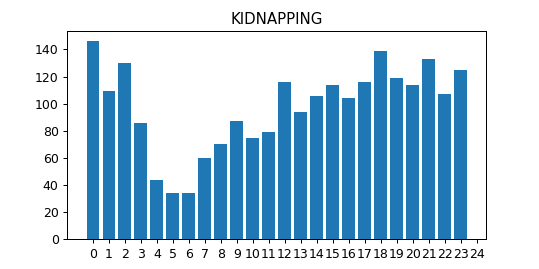

<IPython.core.display.Javascript object>


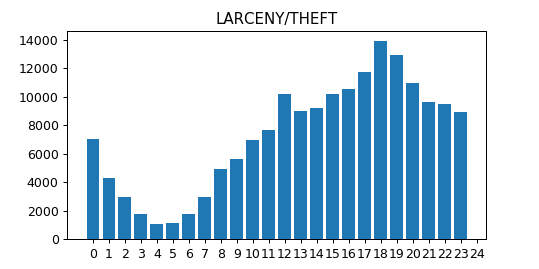

<IPython.core.display.Javascript object>


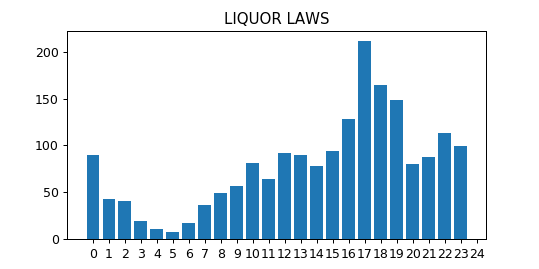

<IPython.core.display.Javascript object>


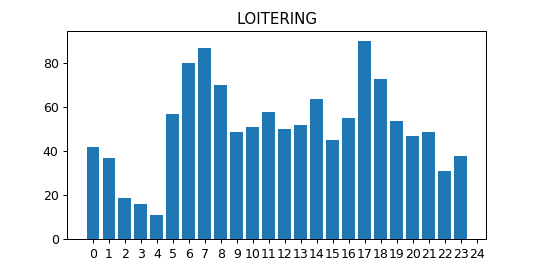

<IPython.core.display.Javascript object>


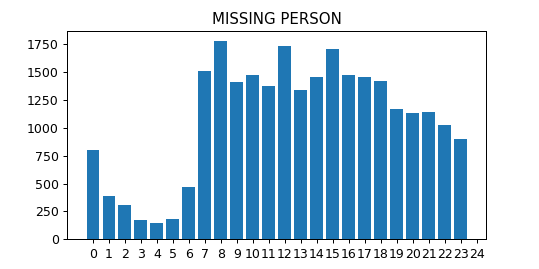

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


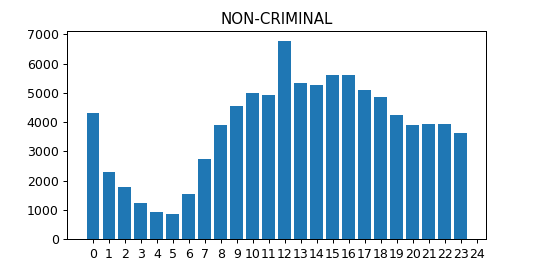

<IPython.core.display.Javascript object>


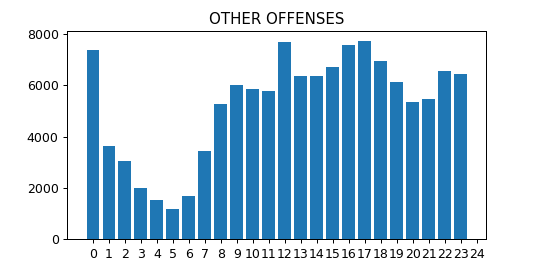

<IPython.core.display.Javascript object>


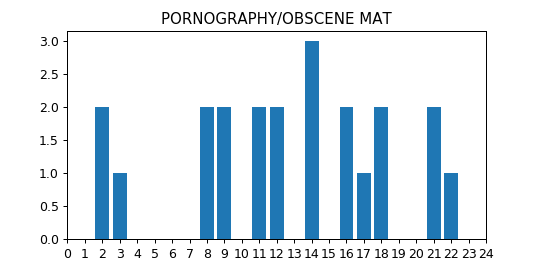

<IPython.core.display.Javascript object>


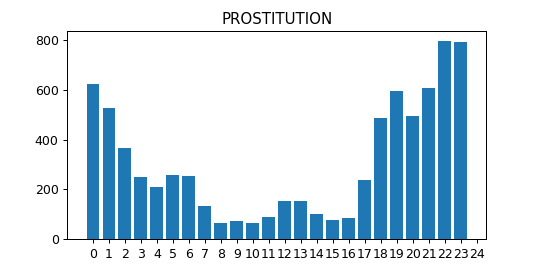

<IPython.core.display.Javascript object>


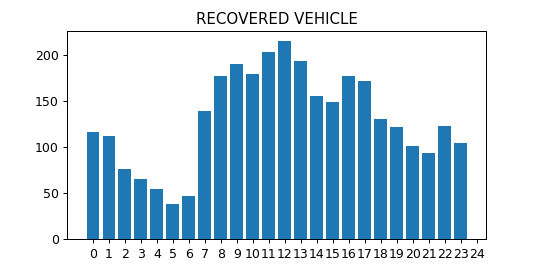

<IPython.core.display.Javascript object>


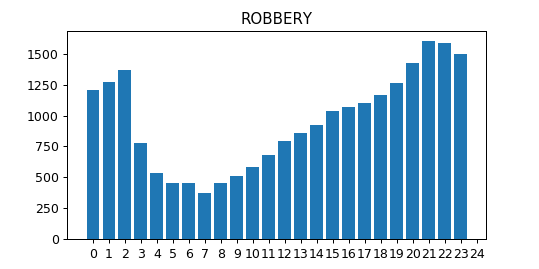

<IPython.core.display.Javascript object>


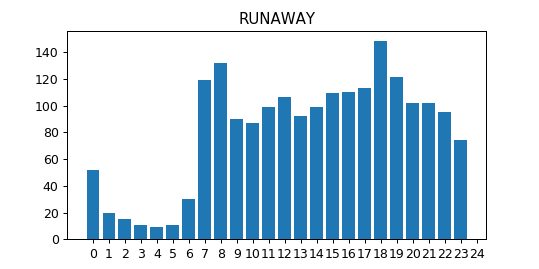

<IPython.core.display.Javascript object>


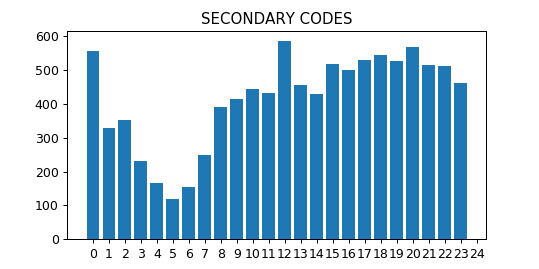

<IPython.core.display.Javascript object>


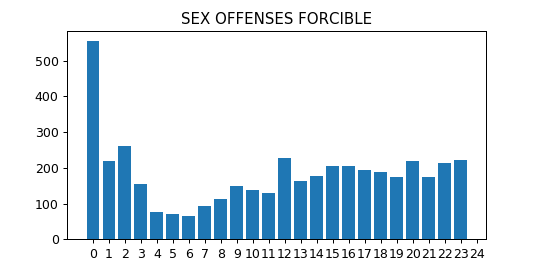

<IPython.core.display.Javascript object>


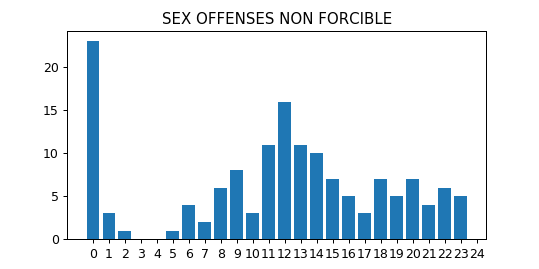

<IPython.core.display.Javascript object>


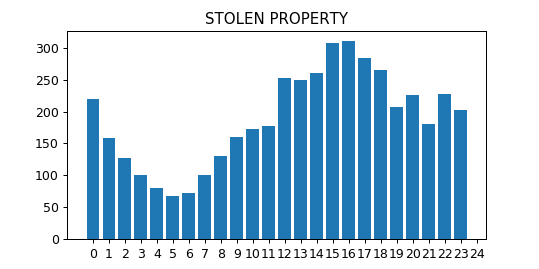

<IPython.core.display.Javascript object>


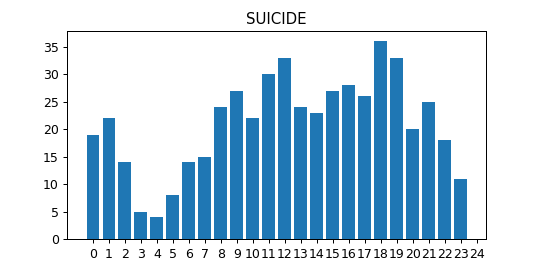

<IPython.core.display.Javascript object>


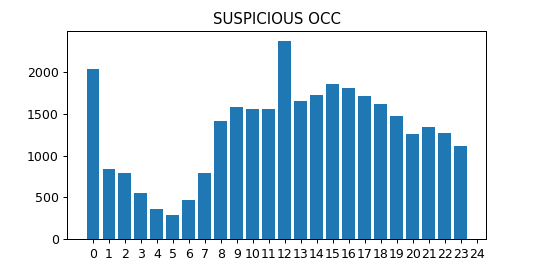

<IPython.core.display.Javascript object>


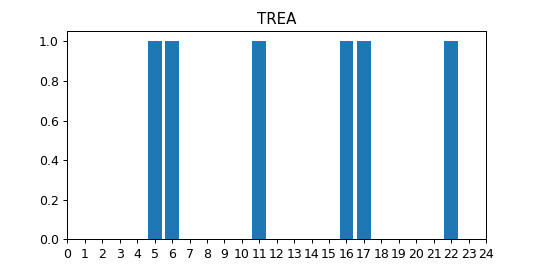

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


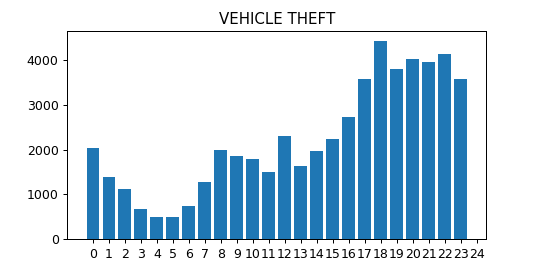

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
# I'm having doubts if my night-day categorization is actually supported by data, let's check this

for crime in sorted(train.Category.unique()):
    subset = train[train.Category == crime]
    plt.figure(figsize=(6, 3))
    plt.bar(left=sorted(set(subset.hour)), height=subset.groupby("hour").size().values)
    plt.title("{}".format(list(cat_map.keys())[list(cat_map.values()).index(crime)]))

    ax = plt.gca()
    ax.set_xticks(range(25)) # this accepts only integers
    #ax.set_xticklabels(np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

In [62]:
# Conclusion - I think the day-night division isn't very accurate.
# I will just use the hour

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


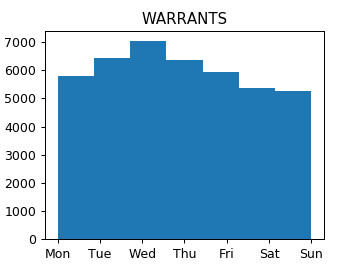

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


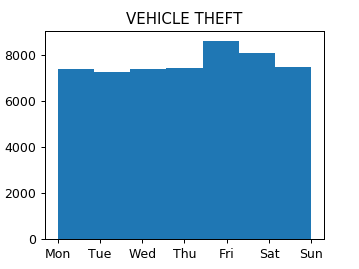

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


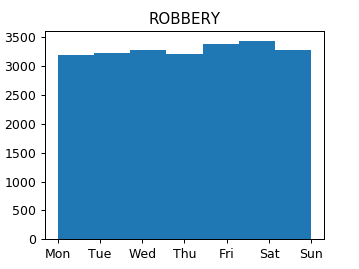

<IPython.core.display.Javascript object>


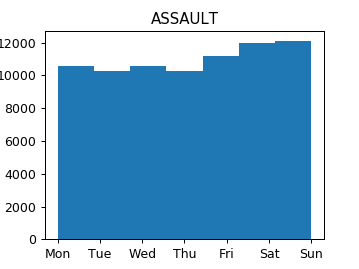

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


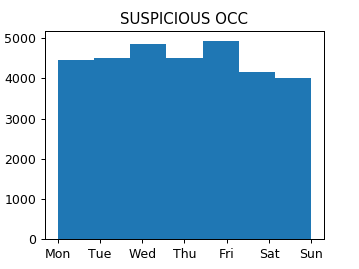

<IPython.core.display.Javascript object>


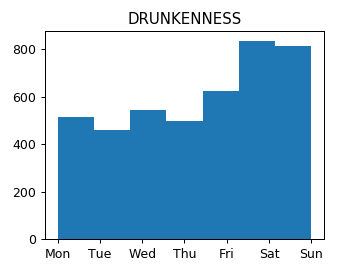

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


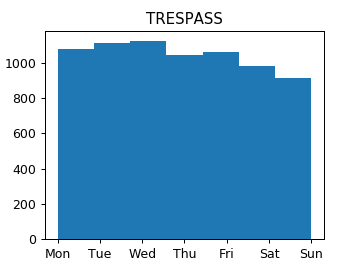

<IPython.core.display.Javascript object>


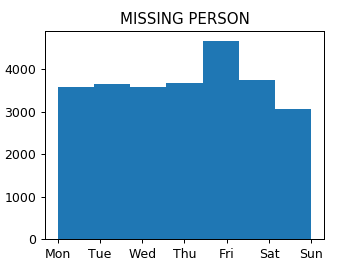

<IPython.core.display.Javascript object>


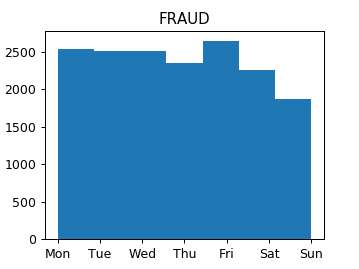

<IPython.core.display.Javascript object>


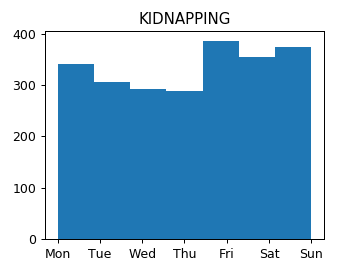

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


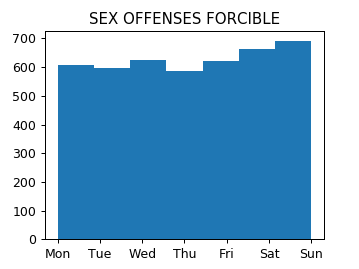

<IPython.core.display.Javascript object>


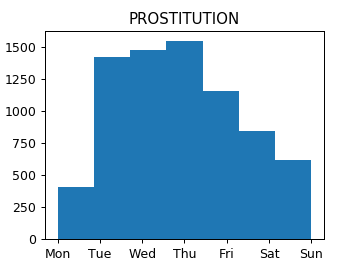

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


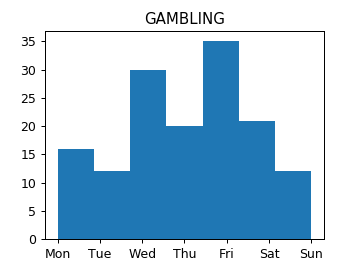

<IPython.core.display.Javascript object>


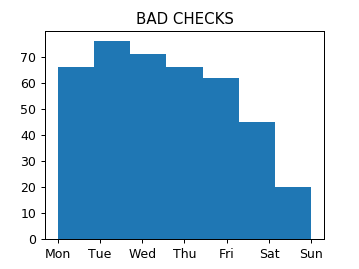

<IPython.core.display.Javascript object>


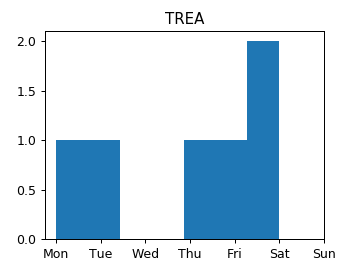

<IPython.core.display.Javascript object>


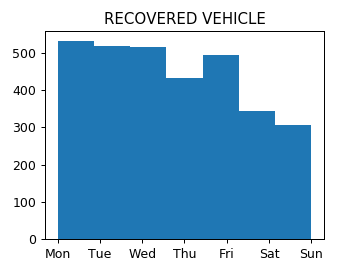

<IPython.core.display.Javascript object>

In [63]:
for crime in train.Category.unique():
    subset = train[train.Category == crime]
    plt.figure(figsize=(4, 3))
    plt.hist(subset.DayOfWeek, bins=7)
    plt.title("{}".format(list(cat_map.keys())[list(cat_map.values()).index(crime)]))

    ax = plt.gca()
    ax.set_xticks(range(1, 8)) # this accepts only integers
    ax.set_xticklabels(np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))


In [64]:
# Okay so what these graphs tell me is that I could engineer the Day of Week feature and
# make it a binary one - weekend vs not weekend

In [65]:
train.DayOfWeek = train.DayOfWeek.apply(lambda x: 1 if x in [5, 6, 7] else 0)
test.DayOfWeek = test.DayOfWeek.apply(lambda x: 1 if x in [5, 6, 7] else 0)

In [66]:
# Let's see if we have to to do unbalanced class distribution
grouped = train.groupby("Category").size()
plt.figure()
plt.bar(left=grouped.index, height=grouped.values)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

<Container object of 39 artists>

In [67]:
# We definately do, which is to keep in mind for the KNN model, as we should not use the majority vote
# As then the class with most incidence will skew the results, I will use weighted

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


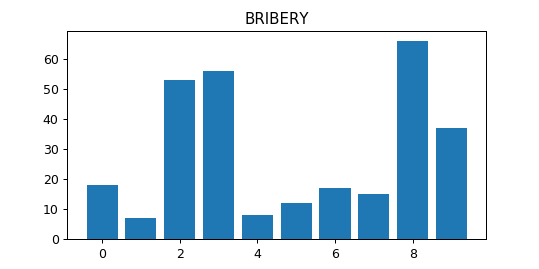

<IPython.core.display.Javascript object>


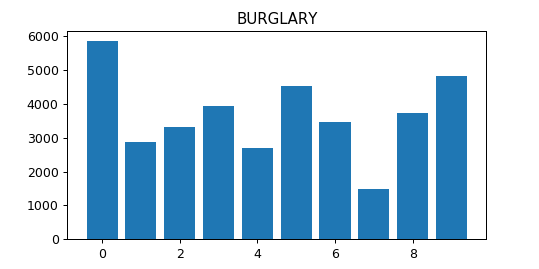

<IPython.core.display.Javascript object>


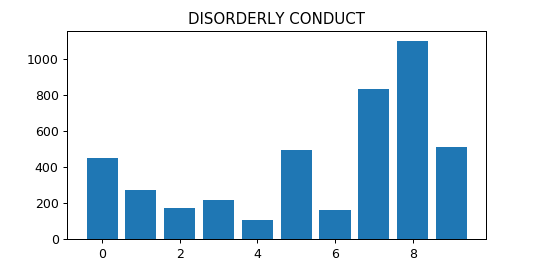

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


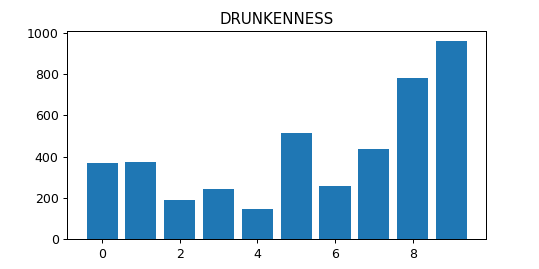

<IPython.core.display.Javascript object>


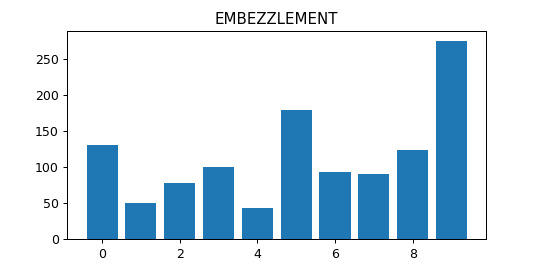

<IPython.core.display.Javascript object>


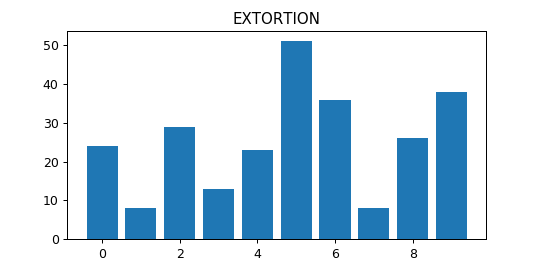

<IPython.core.display.Javascript object>


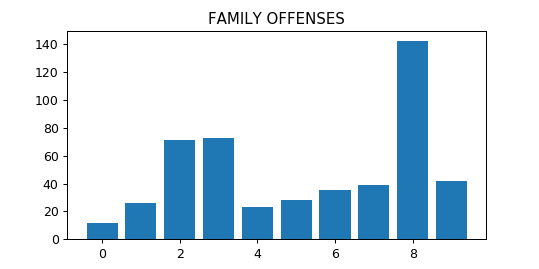

<IPython.core.display.Javascript object>


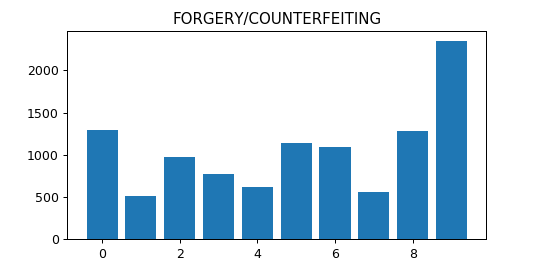

<IPython.core.display.Javascript object>


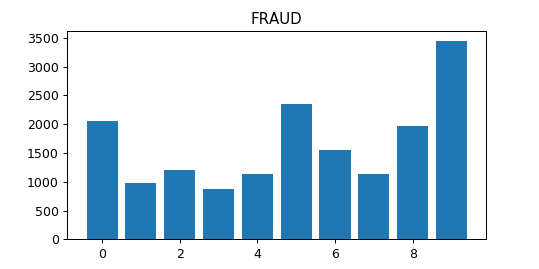

<IPython.core.display.Javascript object>


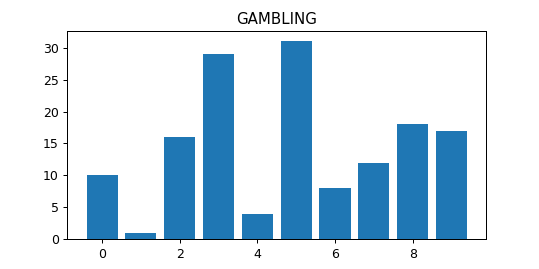

<IPython.core.display.Javascript object>


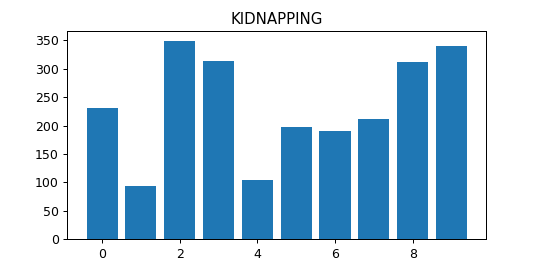

<IPython.core.display.Javascript object>


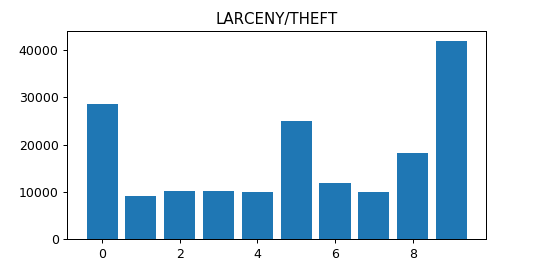

<IPython.core.display.Javascript object>


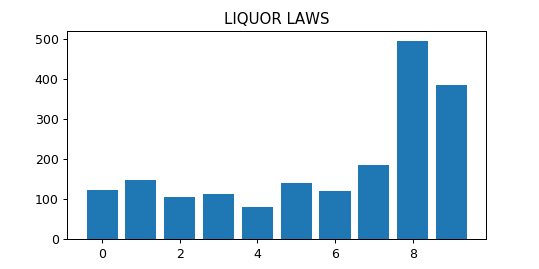

<IPython.core.display.Javascript object>


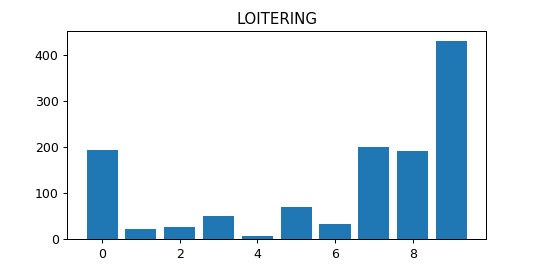

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


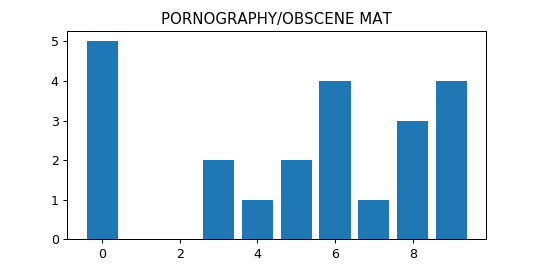

<IPython.core.display.Javascript object>


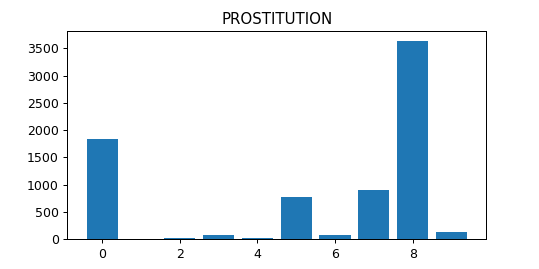

<IPython.core.display.Javascript object>


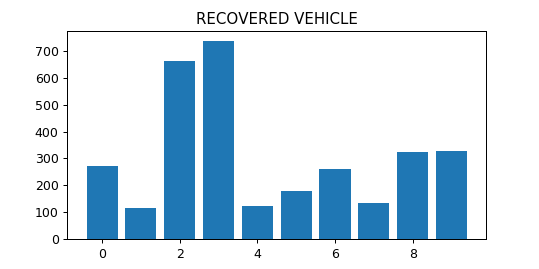

<IPython.core.display.Javascript object>


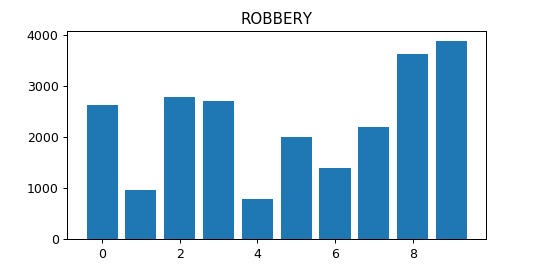

<IPython.core.display.Javascript object>


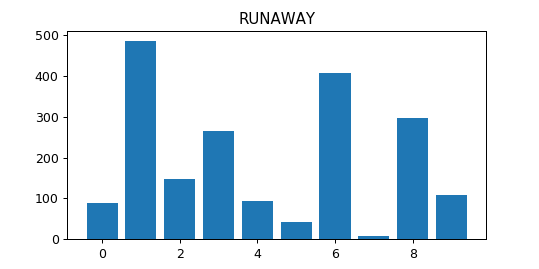

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


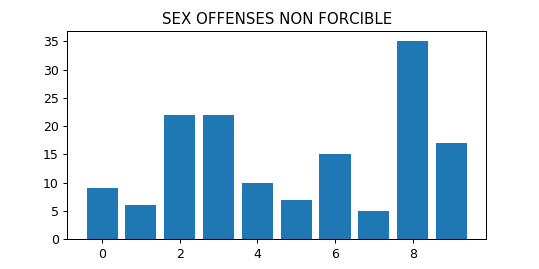

<IPython.core.display.Javascript object>


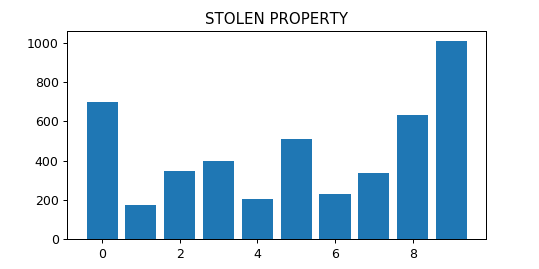

<IPython.core.display.Javascript object>


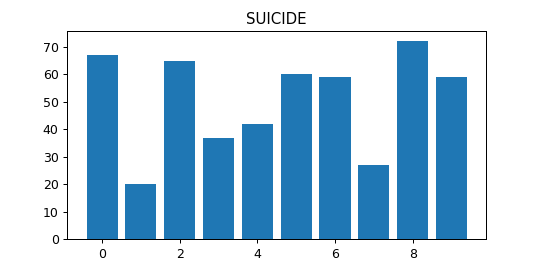

<IPython.core.display.Javascript object>


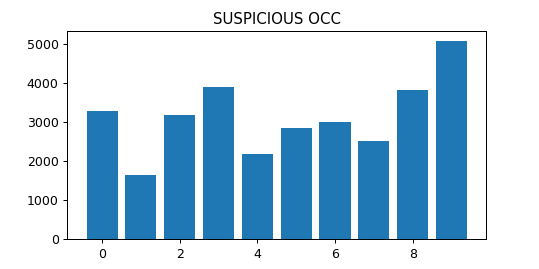

<IPython.core.display.Javascript object>


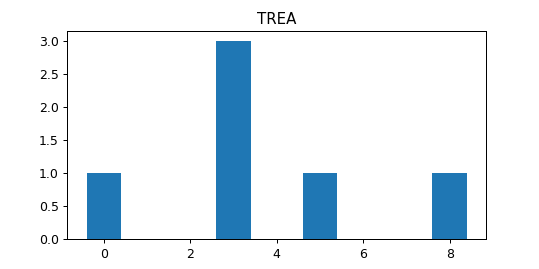

<IPython.core.display.Javascript object>


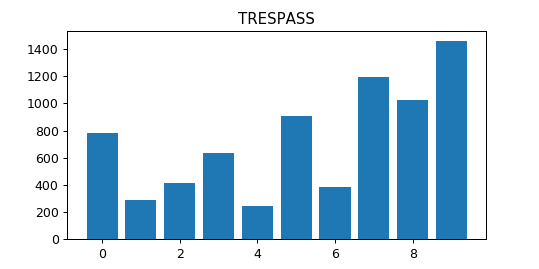

<IPython.core.display.Javascript object>


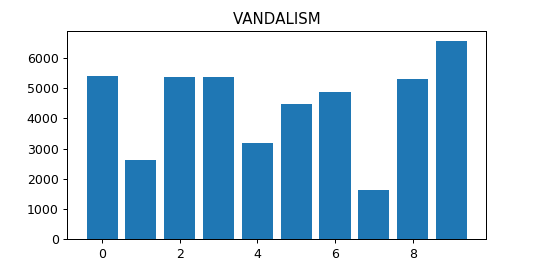

<IPython.core.display.Javascript object>


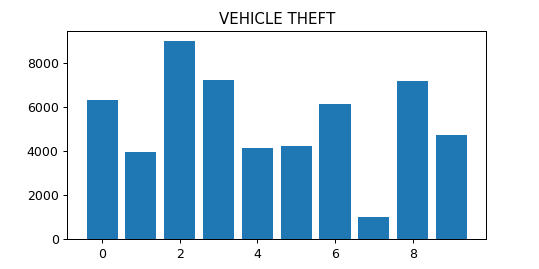

<IPython.core.display.Javascript object>


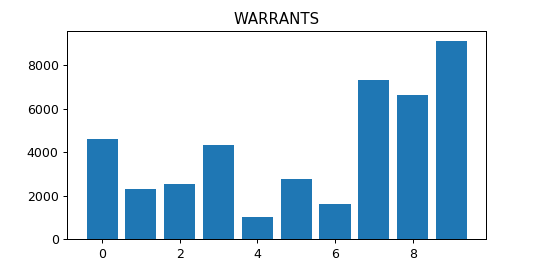

<IPython.core.display.Javascript object>


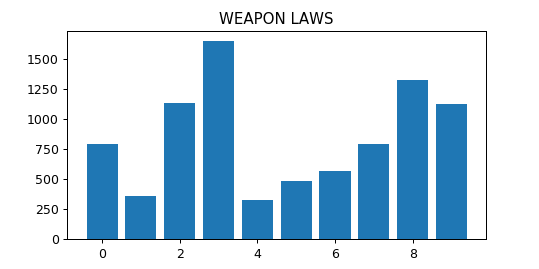

In [68]:
# What about districts?
# I'm having doubts if my night-day categorization is actually supported by data, let's check this

for crime in sorted(train.Category.unique()):
    subset = train[train.Category == crime]
    plt.figure(figsize=(6, 3))
    plt.bar(left=sorted(set(subset.PdDistrict)), height=subset.groupby("PdDistrict").size().values)
    plt.title("{}".format(list(cat_map.keys())[list(cat_map.values()).index(crime)]))

    ax = plt.gca()
    #ax.set_xticks(range(25)) # this accepts only integers
    #ax.set_xticklabels(np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']))

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [70]:
train_sample = train.sample(frac=0.5, random_state=99)
y_sample = train_sample()

y = train['Category']
train.drop(['Category'], axis=1, inplace=True)

In [77]:
### RANDOM FOREST ###

# With no engineered features as benchmark
X = np.array(train[['DayOfWeek', 'PdDistrict', 'hour']])
y = np.array(y)

classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("random_forest_15_original_features.csv", sep=",", index=False)

# KAGGLE SCORE: 2.85935
# The lower the score, the better

In [80]:
### KNN ###

# With no engineered features as benchmark

X = np.array(train[['DayOfWeek', 'PdDistrict', 'hour']])
y = np.array(y)

classifier = classifier = KNeighborsClassifier(n_neighbors=100)
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("KNN_100_original_features.csv", sep=",", index=False)

# KAGGLE SCORE: 4.22670

In [84]:
### KNN ###

# With no engineered features as benchmark DISTANCE - weighted

X = np.array(train[['DayOfWeek', 'PdDistrict', 'hour']])
y = np.array(y)

classifier = classifier = KNeighborsClassifier(n_neighbors=100, weights='distance')
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("KNN_100_original_features_weights_distance.csv", sep=",", index=False)

# KAGGLE SCORE:4.23060

In [82]:
### RANDOM FOREST ###

# With weekend - no weekend
X = np.array(train[['PdDistrict', 'hour', 'weekend']])
y = np.array(y)

classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['PdDistrict', 'hour', 'weekend']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("random_forest_15_weekend.csv", sep=",", index=False)

# KAGGLE SCORE: 2.64136

In [86]:
### RANDOM FOREST ###

# With weekend - no weekend AND daytime - nighttime
X = np.array(train[['PdDistrict', 'daynight', 'weekend']])
y = np.array(y)

classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['PdDistrict', 'daynight', 'weekend']]
pred = clf.predict_proba(np.array(test_submit))

final = pd.DataFrame(pred)
final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)
final.reset_index(inplace=True)
final.to_csv("random_forest_15_weekend_and_daynight.csv", sep=",", index=False)

# KAGGLE SCORE: 2.60497

# Okay so this is the highest score so far. The choice of features is correct.
# Now I have to fine tune the model. I have to sample the data as otherwise I get memory errors.

In [ ]:
X = np.array(train[['PdDistrict', 'daynight', 'weekend']])
X = X.sample(frac=0.5, random_state=99)
y = np.array(y)

In [37]:
X = np.array(train)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [67]:
# Let's test different models with different parameters
# The competition requires submitting probabilities of each class.
# I don't know how to check my score for multiclass probabilities output
# So I will predict class, pick the model with best score, and use predict_proba using this model and submit.


# With daynight

for n in [10, 15, 40, 70, 100]:
    classifier = RandomForestClassifier(n_estimators=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.22225006169
15 0.22225006169
40 0.22225006169
70 0.22225006169
100 0.22225006169


In [38]:
# With hour

for n in [10, 15, 40, 70, 100]:
    classifier = RandomForestClassifier(n_estimators=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.225769223469
15 0.226251352429
40 0.225757834596
70 0.225951445438
100 0.225985612057


In [68]:
# With daynight

for n in [10, 15, 40, 70, 100, 200, 500, 1000]:
    classifier = KNeighborsClassifier(n_neighbors=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.174655961126
15 0.170741985081
40 0.211354706452
70 0.21398173984
100 0.213404703605
200 0.216847939563
500 0.22188182146
1000 0.221209877949


In [39]:
# With hour

for n in [10, 15, 40, 70]:
    classifier = KNeighborsClassifier(n_neighbors=n)
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.164796993338
15 0.179055862422
40 0.203317958355
70 0.21401970275


In [47]:
for n in [10, 15, 40, 70, 100, 200, 500]:
    classifier = KNeighborsClassifier(n_neighbors=n, weights='distance')
    clf = classifier.fit(X_train, y_train)
    pred  = clf.predict(X_test)
    print(str(n), accuracy_score(y_test, pred))

10 0.172738834159
15 0.187255851034
40 0.208215173775
70 0.211703965226
100 0.214368961525
200 0.219865990927
500 0.220648026878


MemoryError: 

In [43]:
# SUBMISSION
classifier = RandomForestClassifier(n_estimators=15)
clf = classifier.fit(X, y)
test_submit = test[['DayOfWeek', 'PdDistrict', 'hour']]
pred = clf.predict_proba(np.array(test_submit))
# 1 Score: 2.61441, with all days of week
# 2 Score: 2.60499 with weekend no weekend class
# 3 Score: 3.53940 with KNN with weights=distance
# https://www.kaggle.com/c/sf-crime/leaderboard

In [44]:
final = pd.DataFrame(pred)

final.columns = sorted(cat_map.keys())
final.set_index(test['Id'], inplace=True)

final.reset_index(inplace=True)

final.to_csv("random_forest_15_hour.csv", sep=",", index=False)